In [2]:
using Statistics
using Plots

using MATLAB

In [3]:
sess = MSession()

# The MATLAB.jl library interfaces with MATLAB via its C API.
# See intro here: https://github.com/JuliaInterop/MATLAB.jl 

MSession(Ptr{Nothing} @0x000000008c027800, UInt8[0x00, 0x60, 0x95, 0x5d, 0x00, 0x00, 0x00, 0x00, 0x01, 0x00  …  0x00, 0x00, 0x16, 0x7f, 0x73, 0x5d, 0x00, 0x00, 0x00, 0x00], Ptr{UInt8} @0x000000005d956040)

In [4]:
# Interacting with MATLAB is as simple as evaluating a string of MATLAB code.

# Open ADRIA project
adria_loc = "c:/programs/ownCloud/projects/AIMS/ADRIA_repo"
eval_string(sess, "openProject('$(adria_loc)');")

In [5]:
# More complicated code can be run by prefixing a multi-line string with `mat`
# Variable/values can be passed back and forth with string interpolation (indicated with `$variable` or `$(some_variable_name)`)

eval_string(sess, "prj_dir = '$(adria_loc)';")

mat"""
ai = ADRIA();

rd = ai.raw_defaults;
[~, ~, coral_params] = ai.splitParameterTable(rd);
ai = ai.loadConnectivity(strcat(prj_dir, '/Inputs/MooreTPMean.xlsx'));

Y = ai.run(rd, sampled_values=false, nreps=3);
$Ymet = collectMetrics(Y, coral_params, {@coralTaxaCover});
"""

In [7]:
# Get total coral cover over time/sites for each simulation
TC = Ymet["coralTaxaCover"]["total_cover"]

# Reorder so that simulation index is first
TC = permutedims(TC, [3, 1, 2])

# Calculate element-wise mean across simulations
mean_TC = mean(TC, dims=1)

# Drop singleton dimension (equivalent to `squeeze()` in matlab)
mean_TC = dropdims(mean_TC, dims=1);

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1342
┌ Warning: Module FFMPEG_jll with build ID 205429244930909 is missing from the cache.
│ This may mean FFMPEG_jll [b22a6f82-2f65-5046-a5b2-351ab43fb4e5] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


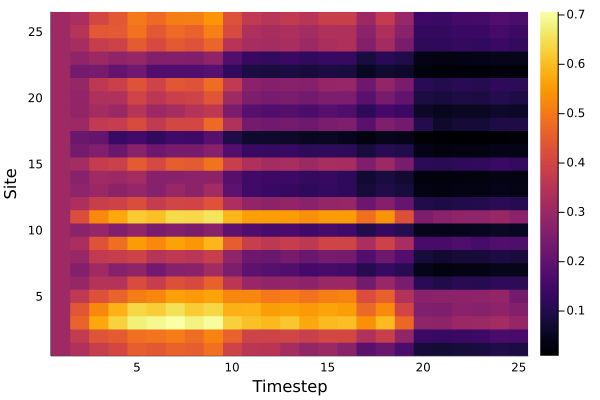

┌ Info: Skipping precompilation since __precompile__(false). Importing GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9].
└ @ Base loading.jl:1047


In [8]:
heatmap(mean_TC', xlabel="Timestep", ylabel="Site")

In [24]:
mat"$Yevenness = collectMetrics(Y, coral_params, {@coralEvenness});"

Ye = Yevenness["coralEvenness"]

# Reorder so that simulation index is first
Ye = permutedims(Ye, [3, 1, 2])

# Calculate element-wise mean across simulations
mean_Ye = mean(Ye, dims=1)

# Drop singleton dimension (equivalent to `squeeze()` in matlab)
mean_Ye = dropdims(mean_Ye, dims=1)[end, :];

# Average evenness at end of simulation time
mean(mean_Ye)

0.5090796398501329